In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD,Adam
import keras
# Conv1D + LSTM

from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten

from tensorflow.keras import models, layers

from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import EfficientNetB6
from tensorflow.keras.applications import InceptionV3

from tensorflow.keras.applications import ResNet50

In [32]:
df_dk=pd.read_csv('/home/amin/Keylogger_Detection.csv')
df_dk.head(5)

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,0,10.42.0.211-52.6.25.230-34451-443-6,10.42.0.211,34451.0,52.6.25.230,443.0,6.0,04/08/2017 05:12:36,12140931.0,9.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,1,172.217.3.99-10.42.0.151-443-53892-6,10.42.0.151,53892.0,172.217.3.99,443.0,6.0,04/08/2017 07:55:51,418882.0,102.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,2,172.217.3.98-10.42.0.151-443-50750-6,172.217.3.98,443.0,10.42.0.151,50750.0,6.0,04/08/2017 08:48:19,45.0,2.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,3,10.42.0.211-10.42.0.1-23025-53-17,10.42.0.211,23025.0,10.42.0.1,53.0,17.0,04/08/2017 05:54:10,541699.0,1.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,4,10.42.0.211-123.129.244.226-52602-443-6,10.42.0.211,52602.0,123.129.244.226,443.0,6.0,04/08/2017 08:44:25,7310795.0,3.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [33]:
df_dk.dtypes

Unnamed: 0           int64
Flow ID             object
 Source IP          object
 Source Port       float64
 Destination IP     object
                    ...   
Idle Mean          float64
 Idle Std          float64
 Idle Max          float64
 Idle Min          float64
Class               object
Length: 86, dtype: object

In [34]:
Class_df = df_dk["Class"]
df_num = df_dk.select_dtypes(include=[np.number])
df_num = df_num.join(Class_df)

In [35]:
df_num.drop('Unnamed: 0', axis=1, inplace=True)

In [36]:
print(df_num.isna().sum().sum())
df_num=df_num.dropna()

879


In [37]:
df_num["label"]=df_num["Class"]
df_num.loc[df_num.label == "Benign", 'label'] = 0
df_num.loc[df_num.label == "Keylogger", 'label'] = 1
df_num.drop('Class', axis=1, inplace=True)
df_num.sample(5)

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
479209,80.0,34437.0,6.0,1007651.0,3.0,1.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
314504,443.0,59180.0,6.0,3566.0,2.0,1.0,0.0,0.0,0.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
75213,51090.0,80.0,6.0,7145842.0,2.0,0.0,0.0,0.0,0.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
507184,34114.0,443.0,6.0,65404031.0,25.0,24.0,2574.0,10086.0,526.0,0.0,...,32.0,412140.0,0.0,412140.0,412140.0,64991874.0,0.0,64991874.0,64991874.0,0
56900,54927.0,443.0,6.0,113232.0,2.0,0.0,0.0,0.0,0.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [38]:
df_num=df_num.sample(n=200000)

In [39]:
df_num.groupby('label').size()

label
0    117823
1     82177
dtype: int64

In [40]:
for col in (df_num.iloc[:,:-1].columns):
    if(df_num[col].min()==df_num[col].max()):
            df_num.drop(col, axis=1, inplace=True)

In [43]:
# Normalization OR Standardization
def standardize(df,col):
    #df[col]= (df[col]-df[col].mean())/(df[col].std()) # Standardization
    df[col]= 255*(df[col]-df[col].min())/(df[col].max()-df[col].min()) #Normalization

for i in (df_num.iloc[:,:-1].columns):
    standardize (df_num,i)

df_num.head()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
273044,219.048938,1.726554,90.0,27.603774,0.088235,0.034016,0.000000,0.000000,0.000000,0.000000,...,227.225216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
350214,241.474089,0.206563,255.0,0.581682,0.000000,0.017008,0.000755,0.001366,6.462329,6.462329,...,227.225216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
371652,1.723814,203.897108,90.0,0.390885,0.000000,0.034016,0.000000,0.000000,0.000000,0.000000,...,227.225218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
447840,195.444745,1.726554,90.0,8.860926,0.029412,0.000000,0.000000,0.000000,0.000000,0.000000,...,227.225218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
519928,232.298572,1.726554,90.0,5.066217,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,...,227.225216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [44]:
for i in range(957):
    col="A"+str(i)
    df_num[col]=0

df_num.shape

(200000, 1025)

In [45]:
target=['label']
features = [c for c in df_num.columns if c!="label"]

<class 'numpy.ndarray'>


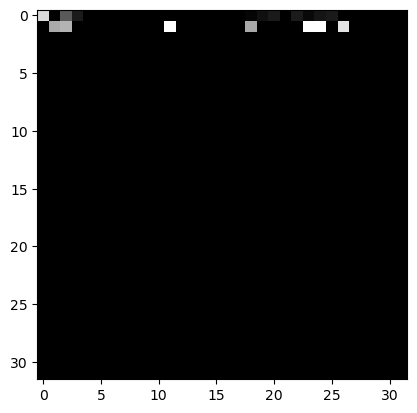

In [46]:
row_1=df_num[features].iloc[0].to_numpy()
row_1.shape
row_2=row_1.reshape(32, 32)
row_2=row_2.astype(int)
print(type(row_2))
from matplotlib import pyplot as plt
plt.imshow(row_2,cmap='gray')
plt.show()

In [47]:
X = df_num[features].values # Features
y = df_num[target].values # Target

X=X.astype(np.float32)
y=y.astype(np.float32)

X.shape,y.shape,

((200000, 1024), (200000, 1))

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [49]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((160000, 1024), (40000, 1024), (160000, 1), (40000, 1))

In [50]:
X_train_cnn = np.reshape(X_train, (X_train.shape[0], 32,32,1))
X_test_cnn = np.reshape(X_test, (X_test.shape[0], 32,32,1))
print(X_train_cnn.shape)
print(X_test_cnn.shape)

(160000, 32, 32, 1)
(40000, 32, 32, 1)


In [52]:
learning_rate=0.0001
batch_size=1024
epochs = 50

model_save = ModelCheckpoint('.weights.h5', 
                             save_best_only = True, 
                             save_weights_only = True,
                             monitor = 'val_loss', 
                             mode = 'min', verbose = 1)
early_stop = EarlyStopping(monitor = 'val_loss', min_delta = 0.0001, 
                           patience = 10, mode = 'min', verbose = 1,
                           restore_best_weights = True)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.75, 
                              patience = 10, min_delta = 0.0001, 
                              mode = 'min', verbose = 1)

In [53]:
def create_model(): 
    inputs = layers.Input(shape=(32,32,1))
    efficientnet_layers = EfficientNetB0(include_top=False,input_shape=(),weights='imagenet',pooling='avg')
    model = Sequential()
    
    model.add(inputs)
    model.add(keras.layers.Conv2D(3,3,activation='relu',padding='same'))
    model.add(efficientnet_layers)
    #model.add(Dropout(0.3))
    model.add(Dense(1, activation="sigmoid"))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=[keras.metrics.AUC(name='auc')])

    return model

model = create_model()
model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 3)      │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 1280)           │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,050,882 (15.45 MB)

 Trainable params: 4,008,859 (15.29 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [54]:
history = model.fit(X_train_cnn,
                    y_train,
                    batch_size=batch_size,
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    epochs=epochs,
                    validation_data=(X_test_cnn,y_test),
                    callbacks = [model_save, early_stop, reduce_lr],)

Epoch 1/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - auc: 0.5734 - loss: 0.6959
Epoch 1: val_loss improved from inf to 0.74089, saving model to .weights.h5
156/156 ━━━━━━━━━━━━━━━━━━━━ 483s 3s/step - auc: 0.5735 - loss: 0.6958 - val_auc: 0.4956 - val_loss: 0.7409 - learning_rate: 1.0000e-04
Epoch 2/50
  1/156 ━━━━━━━━━━━━━━━━━━━━ 2:03 795ms/step - auc: 0.6428 - loss: 0.6455

2024-04-07 00:03:02.880374: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 2: val_loss improved from 0.74089 to 0.73952, saving model to .weights.h5
156/156 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - auc: 0.6428 - loss: 0.3248 - val_auc: 0.4921 - val_loss: 0.7395 - learning_rate: 1.0000e-04
Epoch 3/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - auc: 0.6262 - loss: 0.6492
Epoch 3: val_loss improved from 0.73952 to 0.72658, saving model to .weights.h5
156/156 ━━━━━━━━━━━━━━━━━━━━ 466s 3s/step - auc: 0.6262 - loss: 0.6492 - val_auc: 0.5052 - val_loss: 0.7266 - learning_rate: 1.0000e-04
Epoch 4/50
  1/156 ━━━━━━━━━━━━━━━━━━━━ 2:00 780ms/step - auc: 0.6417 - loss: 0.6679

2024-04-07 00:10:57.504600: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 4: val_loss did not improve from 0.72658
156/156 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - auc: 0.6417 - loss: 0.3361 - val_auc: 0.5043 - val_loss: 0.7270 - learning_rate: 1.0000e-04
Epoch 5/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - auc: 0.6421 - loss: 0.6379
Epoch 5: val_loss improved from 0.72658 to 0.71904, saving model to .weights.h5
156/156 ━━━━━━━━━━━━━━━━━━━━ 466s 3s/step - auc: 0.6421 - loss: 0.6379 - val_auc: 0.4844 - val_loss: 0.7190 - learning_rate: 1.0000e-04
Epoch 6/50
  1/156 ━━━━━━━━━━━━━━━━━━━━ 1:59 771ms/step - auc: 0.6731 - loss: 0.6170

2024-04-07 00:18:51.294201: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 6: val_loss did not improve from 0.71904
156/156 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - auc: 0.6731 - loss: 0.3105 - val_auc: 0.4816 - val_loss: 0.7211 - learning_rate: 1.0000e-04
Epoch 7/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - auc: 0.6536 - loss: 0.6314
Epoch 7: val_loss improved from 0.71904 to 0.71331, saving model to .weights.h5
156/156 ━━━━━━━━━━━━━━━━━━━━ 471s 3s/step - auc: 0.6537 - loss: 0.6314 - val_auc: 0.4991 - val_loss: 0.7133 - learning_rate: 1.0000e-04
Epoch 8/50
  1/156 ━━━━━━━━━━━━━━━━━━━━ 1:56 753ms/step - auc: 0.6735 - loss: 0.6030

2024-04-07 00:26:50.275522: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 8: val_loss did not improve from 0.71331
156/156 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - auc: 0.6735 - loss: 0.3034 - val_auc: 0.4965 - val_loss: 0.7156 - learning_rate: 1.0000e-04
Epoch 9/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - auc: 0.6634 - loss: 0.6242
Epoch 9: val_loss improved from 0.71331 to 0.65570, saving model to .weights.h5
156/156 ━━━━━━━━━━━━━━━━━━━━ 469s 3s/step - auc: 0.6634 - loss: 0.6242 - val_auc: 0.6058 - val_loss: 0.6557 - learning_rate: 1.0000e-04
Epoch 10/50
  1/156 ━━━━━━━━━━━━━━━━━━━━ 2:06 815ms/step - auc: 0.6383 - loss: 0.6344

2024-04-07 00:34:47.425931: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 10: val_loss improved from 0.65570 to 0.65278, saving model to .weights.h5
156/156 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - auc: 0.6383 - loss: 0.3192 - val_auc: 0.6115 - val_loss: 0.6528 - learning_rate: 1.0000e-04
Epoch 11/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - auc: 0.6692 - loss: 0.6216
Epoch 11: val_loss improved from 0.65278 to 0.63052, saving model to .weights.h5
156/156 ━━━━━━━━━━━━━━━━━━━━ 468s 3s/step - auc: 0.6693 - loss: 0.6216 - val_auc: 0.6585 - val_loss: 0.6305 - learning_rate: 1.0000e-04
Epoch 12/50
  1/156 ━━━━━━━━━━━━━━━━━━━━ 1:59 768ms/step - auc: 0.6374 - loss: 0.6472

2024-04-07 00:42:43.143874: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 12: val_loss did not improve from 0.63052
156/156 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - auc: 0.6374 - loss: 0.3257 - val_auc: 0.6572 - val_loss: 0.6307 - learning_rate: 1.0000e-04
Epoch 13/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - auc: 0.6794 - loss: 0.6139
Epoch 13: val_loss improved from 0.63052 to 0.62877, saving model to .weights.h5
156/156 ━━━━━━━━━━━━━━━━━━━━ 467s 3s/step - auc: 0.6794 - loss: 0.6139 - val_auc: 0.6650 - val_loss: 0.6288 - learning_rate: 1.0000e-04
Epoch 14/50
  1/156 ━━━━━━━━━━━━━━━━━━━━ 2:00 779ms/step - auc: 0.6353 - loss: 0.6538

2024-04-07 00:50:38.110892: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 14: val_loss improved from 0.62877 to 0.62837, saving model to .weights.h5
156/156 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - auc: 0.6353 - loss: 0.3290 - val_auc: 0.6649 - val_loss: 0.6284 - learning_rate: 1.0000e-04
Epoch 15/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - auc: 0.6846 - loss: 0.6117
Epoch 15: val_loss did not improve from 0.62837
156/156 ━━━━━━━━━━━━━━━━━━━━ 467s 3s/step - auc: 0.6846 - loss: 0.6117 - val_auc: 0.6378 - val_loss: 0.6405 - learning_rate: 1.0000e-04
Epoch 16/50
  1/156 ━━━━━━━━━━━━━━━━━━━━ 2:04 800ms/step - auc: 0.7211 - loss: 0.5927

2024-04-07 00:58:33.342049: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 16: val_loss did not improve from 0.62837
156/156 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - auc: 0.7211 - loss: 0.2982 - val_auc: 0.6400 - val_loss: 0.6401 - learning_rate: 1.0000e-04
Epoch 17/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - auc: 0.6934 - loss: 0.6067
Epoch 17: val_loss improved from 0.62837 to 0.62027, saving model to .weights.h5
156/156 ━━━━━━━━━━━━━━━━━━━━ 468s 3s/step - auc: 0.6934 - loss: 0.6067 - val_auc: 0.6677 - val_loss: 0.6203 - learning_rate: 1.0000e-04
Epoch 18/50
  1/156 ━━━━━━━━━━━━━━━━━━━━ 1:59 772ms/step - auc: 0.6893 - loss: 0.6163

2024-04-07 01:06:29.012756: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 18: val_loss did not improve from 0.62027
156/156 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - auc: 0.6893 - loss: 0.3101 - val_auc: 0.6641 - val_loss: 0.6215 - learning_rate: 1.0000e-04
Epoch 19/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - auc: 0.6933 - loss: 0.6054
Epoch 19: val_loss did not improve from 0.62027
156/156 ━━━━━━━━━━━━━━━━━━━━ 468s 3s/step - auc: 0.6933 - loss: 0.6054 - val_auc: 0.6420 - val_loss: 0.6372 - learning_rate: 1.0000e-04
Epoch 20/50
  1/156 ━━━━━━━━━━━━━━━━━━━━ 2:04 801ms/step - auc: 0.7177 - loss: 0.5888

2024-04-07 01:14:24.266960: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 20: val_loss did not improve from 0.62027
156/156 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - auc: 0.7177 - loss: 0.2963 - val_auc: 0.6508 - val_loss: 0.6315 - learning_rate: 1.0000e-04
Epoch 21/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - auc: 0.6975 - loss: 0.6026
Epoch 21: val_loss improved from 0.62027 to 0.61785, saving model to .weights.h5
156/156 ━━━━━━━━━━━━━━━━━━━━ 468s 3s/step - auc: 0.6975 - loss: 0.6026 - val_auc: 0.6685 - val_loss: 0.6179 - learning_rate: 1.0000e-04
Epoch 22/50
  1/156 ━━━━━━━━━━━━━━━━━━━━ 1:56 753ms/step - auc: 0.6640 - loss: 0.6277

2024-04-07 01:22:19.649647: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 22: val_loss did not improve from 0.61785
156/156 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - auc: 0.6640 - loss: 0.3159 - val_auc: 0.6686 - val_loss: 0.6186 - learning_rate: 1.0000e-04
Epoch 23/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - auc: 0.7011 - loss: 0.5993
Epoch 23: val_loss did not improve from 0.61785
156/156 ━━━━━━━━━━━━━━━━━━━━ 468s 3s/step - auc: 0.7011 - loss: 0.5993 - val_auc: 0.6680 - val_loss: 0.6213 - learning_rate: 1.0000e-04
Epoch 24/50
  1/156 ━━━━━━━━━━━━━━━━━━━━ 2:03 796ms/step - auc: 0.6992 - loss: 0.6072

2024-04-07 01:30:14.891486: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 24: val_loss did not improve from 0.61785
156/156 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - auc: 0.6992 - loss: 0.3056 - val_auc: 0.6685 - val_loss: 0.6209 - learning_rate: 1.0000e-04
Epoch 25/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - auc: 0.7061 - loss: 0.5956
Epoch 25: val_loss improved from 0.61785 to 0.61637, saving model to .weights.h5
156/156 ━━━━━━━━━━━━━━━━━━━━ 468s 3s/step - auc: 0.7061 - loss: 0.5956 - val_auc: 0.6808 - val_loss: 0.6164 - learning_rate: 1.0000e-04
Epoch 26/50
  1/156 ━━━━━━━━━━━━━━━━━━━━ 2:02 788ms/step - auc: 0.7012 - loss: 0.6007

2024-04-07 01:38:10.150886: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 26: val_loss did not improve from 0.61637
156/156 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - auc: 0.7012 - loss: 0.3023 - val_auc: 0.6771 - val_loss: 0.6189 - learning_rate: 1.0000e-04
Epoch 27/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - auc: 0.7071 - loss: 0.5945
Epoch 27: val_loss did not improve from 0.61637
156/156 ━━━━━━━━━━━━━━━━━━━━ 468s 3s/step - auc: 0.7071 - loss: 0.5945 - val_auc: 0.6425 - val_loss: 0.6441 - learning_rate: 1.0000e-04
Epoch 28/50
  1/156 ━━━━━━━━━━━━━━━━━━━━ 2:01 786ms/step - auc: 0.6584 - loss: 0.6235

2024-04-07 01:46:05.416138: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 28: val_loss did not improve from 0.61637
156/156 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - auc: 0.6584 - loss: 0.3138 - val_auc: 0.6441 - val_loss: 0.6428 - learning_rate: 1.0000e-04
Epoch 29/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - auc: 0.7112 - loss: 0.5907
Epoch 29: val_loss did not improve from 0.61637
156/156 ━━━━━━━━━━━━━━━━━━━━ 469s 3s/step - auc: 0.7112 - loss: 0.5907 - val_auc: 0.6776 - val_loss: 0.6173 - learning_rate: 1.0000e-04
Epoch 30/50
  1/156 ━━━━━━━━━━━━━━━━━━━━ 2:03 795ms/step - auc: 0.6381 - loss: 0.6312

2024-04-07 01:54:02.003175: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 30: val_loss did not improve from 0.61637
156/156 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - auc: 0.6381 - loss: 0.3176 - val_auc: 0.6771 - val_loss: 0.6177 - learning_rate: 1.0000e-04
Epoch 31/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - auc: 0.7142 - loss: 0.5880
Epoch 31: val_loss improved from 0.61637 to 0.60341, saving model to .weights.h5
156/156 ━━━━━━━━━━━━━━━━━━━━ 467s 3s/step - auc: 0.7142 - loss: 0.5880 - val_auc: 0.6937 - val_loss: 0.6034 - learning_rate: 1.0000e-04
Epoch 32/50
  1/156 ━━━━━━━━━━━━━━━━━━━━ 1:56 751ms/step - auc: 0.7404 - loss: 0.5773

2024-04-07 02:01:57.520057: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 32: val_loss improved from 0.60341 to 0.60303, saving model to .weights.h5
156/156 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - auc: 0.7404 - loss: 0.2905 - val_auc: 0.6928 - val_loss: 0.6030 - learning_rate: 1.0000e-04
Epoch 33/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - auc: 0.7202 - loss: 0.5860
Epoch 33: val_loss did not improve from 0.60303
156/156 ━━━━━━━━━━━━━━━━━━━━ 468s 3s/step - auc: 0.7201 - loss: 0.5860 - val_auc: 0.6693 - val_loss: 0.6283 - learning_rate: 1.0000e-04
Epoch 34/50
  1/156 ━━━━━━━━━━━━━━━━━━━━ 2:02 791ms/step - auc: 0.7158 - loss: 0.6008

2024-04-07 02:09:52.854507: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 34: val_loss did not improve from 0.60303
156/156 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - auc: 0.7158 - loss: 0.3023 - val_auc: 0.6759 - val_loss: 0.6197 - learning_rate: 1.0000e-04
Epoch 35/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - auc: 0.7236 - loss: 0.5829
Epoch 35: val_loss did not improve from 0.60303
156/156 ━━━━━━━━━━━━━━━━━━━━ 470s 3s/step - auc: 0.7236 - loss: 0.5829 - val_auc: 0.6141 - val_loss: 0.6605 - learning_rate: 1.0000e-04
Epoch 36/50
  1/156 ━━━━━━━━━━━━━━━━━━━━ 1:59 771ms/step - auc: 0.7177 - loss: 0.5784

2024-04-07 02:17:50.229576: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 36: val_loss did not improve from 0.60303
156/156 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - auc: 0.7177 - loss: 0.2911 - val_auc: 0.6209 - val_loss: 0.6550 - learning_rate: 1.0000e-04
Epoch 37/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - auc: 0.7238 - loss: 0.5824
Epoch 37: val_loss improved from 0.60303 to 0.59431, saving model to .weights.h5
156/156 ━━━━━━━━━━━━━━━━━━━━ 469s 3s/step - auc: 0.7238 - loss: 0.5824 - val_auc: 0.7083 - val_loss: 0.5943 - learning_rate: 1.0000e-04
Epoch 38/50
  1/156 ━━━━━━━━━━━━━━━━━━━━ 2:00 776ms/step - auc: 0.7214 - loss: 0.5921

2024-04-07 02:25:47.400477: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 38: val_loss did not improve from 0.59431
156/156 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - auc: 0.7214 - loss: 0.2980 - val_auc: 0.7008 - val_loss: 0.5999 - learning_rate: 1.0000e-04
Epoch 39/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - auc: 0.7248 - loss: 0.5808
Epoch 39: val_loss did not improve from 0.59431
156/156 ━━━━━━━━━━━━━━━━━━━━ 471s 3s/step - auc: 0.7248 - loss: 0.5808 - val_auc: 0.6988 - val_loss: 0.6114 - learning_rate: 1.0000e-04
Epoch 40/50
  1/156 ━━━━━━━━━━━━━━━━━━━━ 2:01 787ms/step - auc: 0.7029 - loss: 0.6037

2024-04-07 02:33:45.961473: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 40: val_loss did not improve from 0.59431
156/156 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - auc: 0.7029 - loss: 0.3038 - val_auc: 0.7000 - val_loss: 0.6095 - learning_rate: 1.0000e-04
Epoch 41/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - auc: 0.7317 - loss: 0.5755
Epoch 41: val_loss did not improve from 0.59431
156/156 ━━━━━━━━━━━━━━━━━━━━ 467s 3s/step - auc: 0.7317 - loss: 0.5755 - val_auc: 0.6946 - val_loss: 0.6067 - learning_rate: 1.0000e-04
Epoch 42/50
  1/156 ━━━━━━━━━━━━━━━━━━━━ 2:04 806ms/step - auc: 0.6944 - loss: 0.5980

2024-04-07 02:41:40.858003: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 42: val_loss did not improve from 0.59431
156/156 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - auc: 0.6944 - loss: 0.3009 - val_auc: 0.6933 - val_loss: 0.6077 - learning_rate: 1.0000e-04
Epoch 43/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - auc: 0.7314 - loss: 0.5755
Epoch 43: val_loss did not improve from 0.59431
156/156 ━━━━━━━━━━━━━━━━━━━━ 467s 3s/step - auc: 0.7314 - loss: 0.5755 - val_auc: 0.6780 - val_loss: 0.6286 - learning_rate: 1.0000e-04
Epoch 44/50
  1/156 ━━━━━━━━━━━━━━━━━━━━ 2:05 807ms/step - auc: 0.7369 - loss: 0.5913

2024-04-07 02:49:35.865984: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 44: val_loss did not improve from 0.59431
156/156 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - auc: 0.7369 - loss: 0.2976 - val_auc: 0.6797 - val_loss: 0.6295 - learning_rate: 1.0000e-04
Epoch 45/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - auc: 0.7329 - loss: 0.5751
Epoch 45: val_loss improved from 0.59431 to 0.59263, saving model to .weights.h5
156/156 ━━━━━━━━━━━━━━━━━━━━ 467s 3s/step - auc: 0.7329 - loss: 0.5751 - val_auc: 0.7118 - val_loss: 0.5926 - learning_rate: 1.0000e-04
Epoch 46/50
  1/156 ━━━━━━━━━━━━━━━━━━━━ 2:04 805ms/step - auc: 0.7192 - loss: 0.5966

2024-04-07 02:57:30.872640: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 46: val_loss improved from 0.59263 to 0.59118, saving model to .weights.h5
156/156 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - auc: 0.7192 - loss: 0.3002 - val_auc: 0.7145 - val_loss: 0.5912 - learning_rate: 1.0000e-04
Epoch 47/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - auc: 0.7372 - loss: 0.5703
Epoch 47: val_loss did not improve from 0.59118
156/156 ━━━━━━━━━━━━━━━━━━━━ 468s 3s/step - auc: 0.7372 - loss: 0.5703 - val_auc: 0.6918 - val_loss: 0.6111 - learning_rate: 1.0000e-04
Epoch 48/50
  1/156 ━━━━━━━━━━━━━━━━━━━━ 2:03 797ms/step - auc: 0.6957 - loss: 0.6291

2024-04-07 03:05:26.018851: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 48: val_loss did not improve from 0.59118
156/156 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - auc: 0.6957 - loss: 0.3166 - val_auc: 0.6832 - val_loss: 0.6172 - learning_rate: 1.0000e-04
Epoch 49/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - auc: 0.7390 - loss: 0.5689
Epoch 49: val_loss did not improve from 0.59118
156/156 ━━━━━━━━━━━━━━━━━━━━ 467s 3s/step - auc: 0.7390 - loss: 0.5689 - val_auc: 0.7060 - val_loss: 0.5992 - learning_rate: 1.0000e-04
Epoch 50/50
  1/156 ━━━━━━━━━━━━━━━━━━━━ 1:58 762ms/step - auc: 0.6644 - loss: 0.6371

2024-04-07 03:13:20.769089: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 50: val_loss did not improve from 0.59118
156/156 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - auc: 0.6644 - loss: 0.3206 - val_auc: 0.7033 - val_loss: 0.6019 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 46.
